Solving questions from: [2022 hw - week 4](https://github.com/DataTalksClub/machine-learning-zoomcamp/blob/master/cohorts/2022/04-evaluation/homework.md)

# Section 1

The goal of this homework is to inspect the output of different evaluation metrics by creating a classification model (target column `card`).

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

%matplotlib inline

In [2]:
data = pd.read_csv('data/AER_credit_card_data.csv')
data.head(3)

,card,reports,age,income,share,expenditure,owner,selfemp,dependents,months,majorcards,active
0,yes,0,37.66667,4.52,0.033270,124.983300,yes,no,3,54,1,12
1,yes,0,33.25000,2.42,0.005217,9.854167,no,no,3,34,1,13
2,yes,0,33.66667,4.50,0.004156,15.000000,yes,no,4,58,1,5


In [3]:
data = data.replace({'card': {'yes': 1, 'no': 0}})
data.head(3)

,card,reports,age,income,share,expenditure,owner,selfemp,dependents,months,majorcards,active
0,1,0,37.66667,4.52,0.033270,124.983300,yes,no,3,54,1,12
1,1,0,33.25000,2.42,0.005217,9.854167,no,no,3,34,1,13
2,1,0,33.66667,4.50,0.004156,15.000000,yes,no,4,58,1,5


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1319 entries, 0 to 1318
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   card         1319 non-null   int64  
 1   reports      1319 non-null   int64  
 2   age          1319 non-null   float64
 3   income       1319 non-null   float64
 4   share        1319 non-null   float64
 5   expenditure  1319 non-null   float64
 6   owner        1319 non-null   object 
 7   selfemp      1319 non-null   object 
 8   dependents   1319 non-null   int64  
 9   months       1319 non-null   int64  
 10  majorcards   1319 non-null   int64  
 11  active       1319 non-null   int64  
dtypes: float64(4), int64(6), object(2)
memory usage: 123.8+ KB


## EDA

C:\Users\devsn\.virtualenvs\ML-Zoomcamp-pE8Q0XHq\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


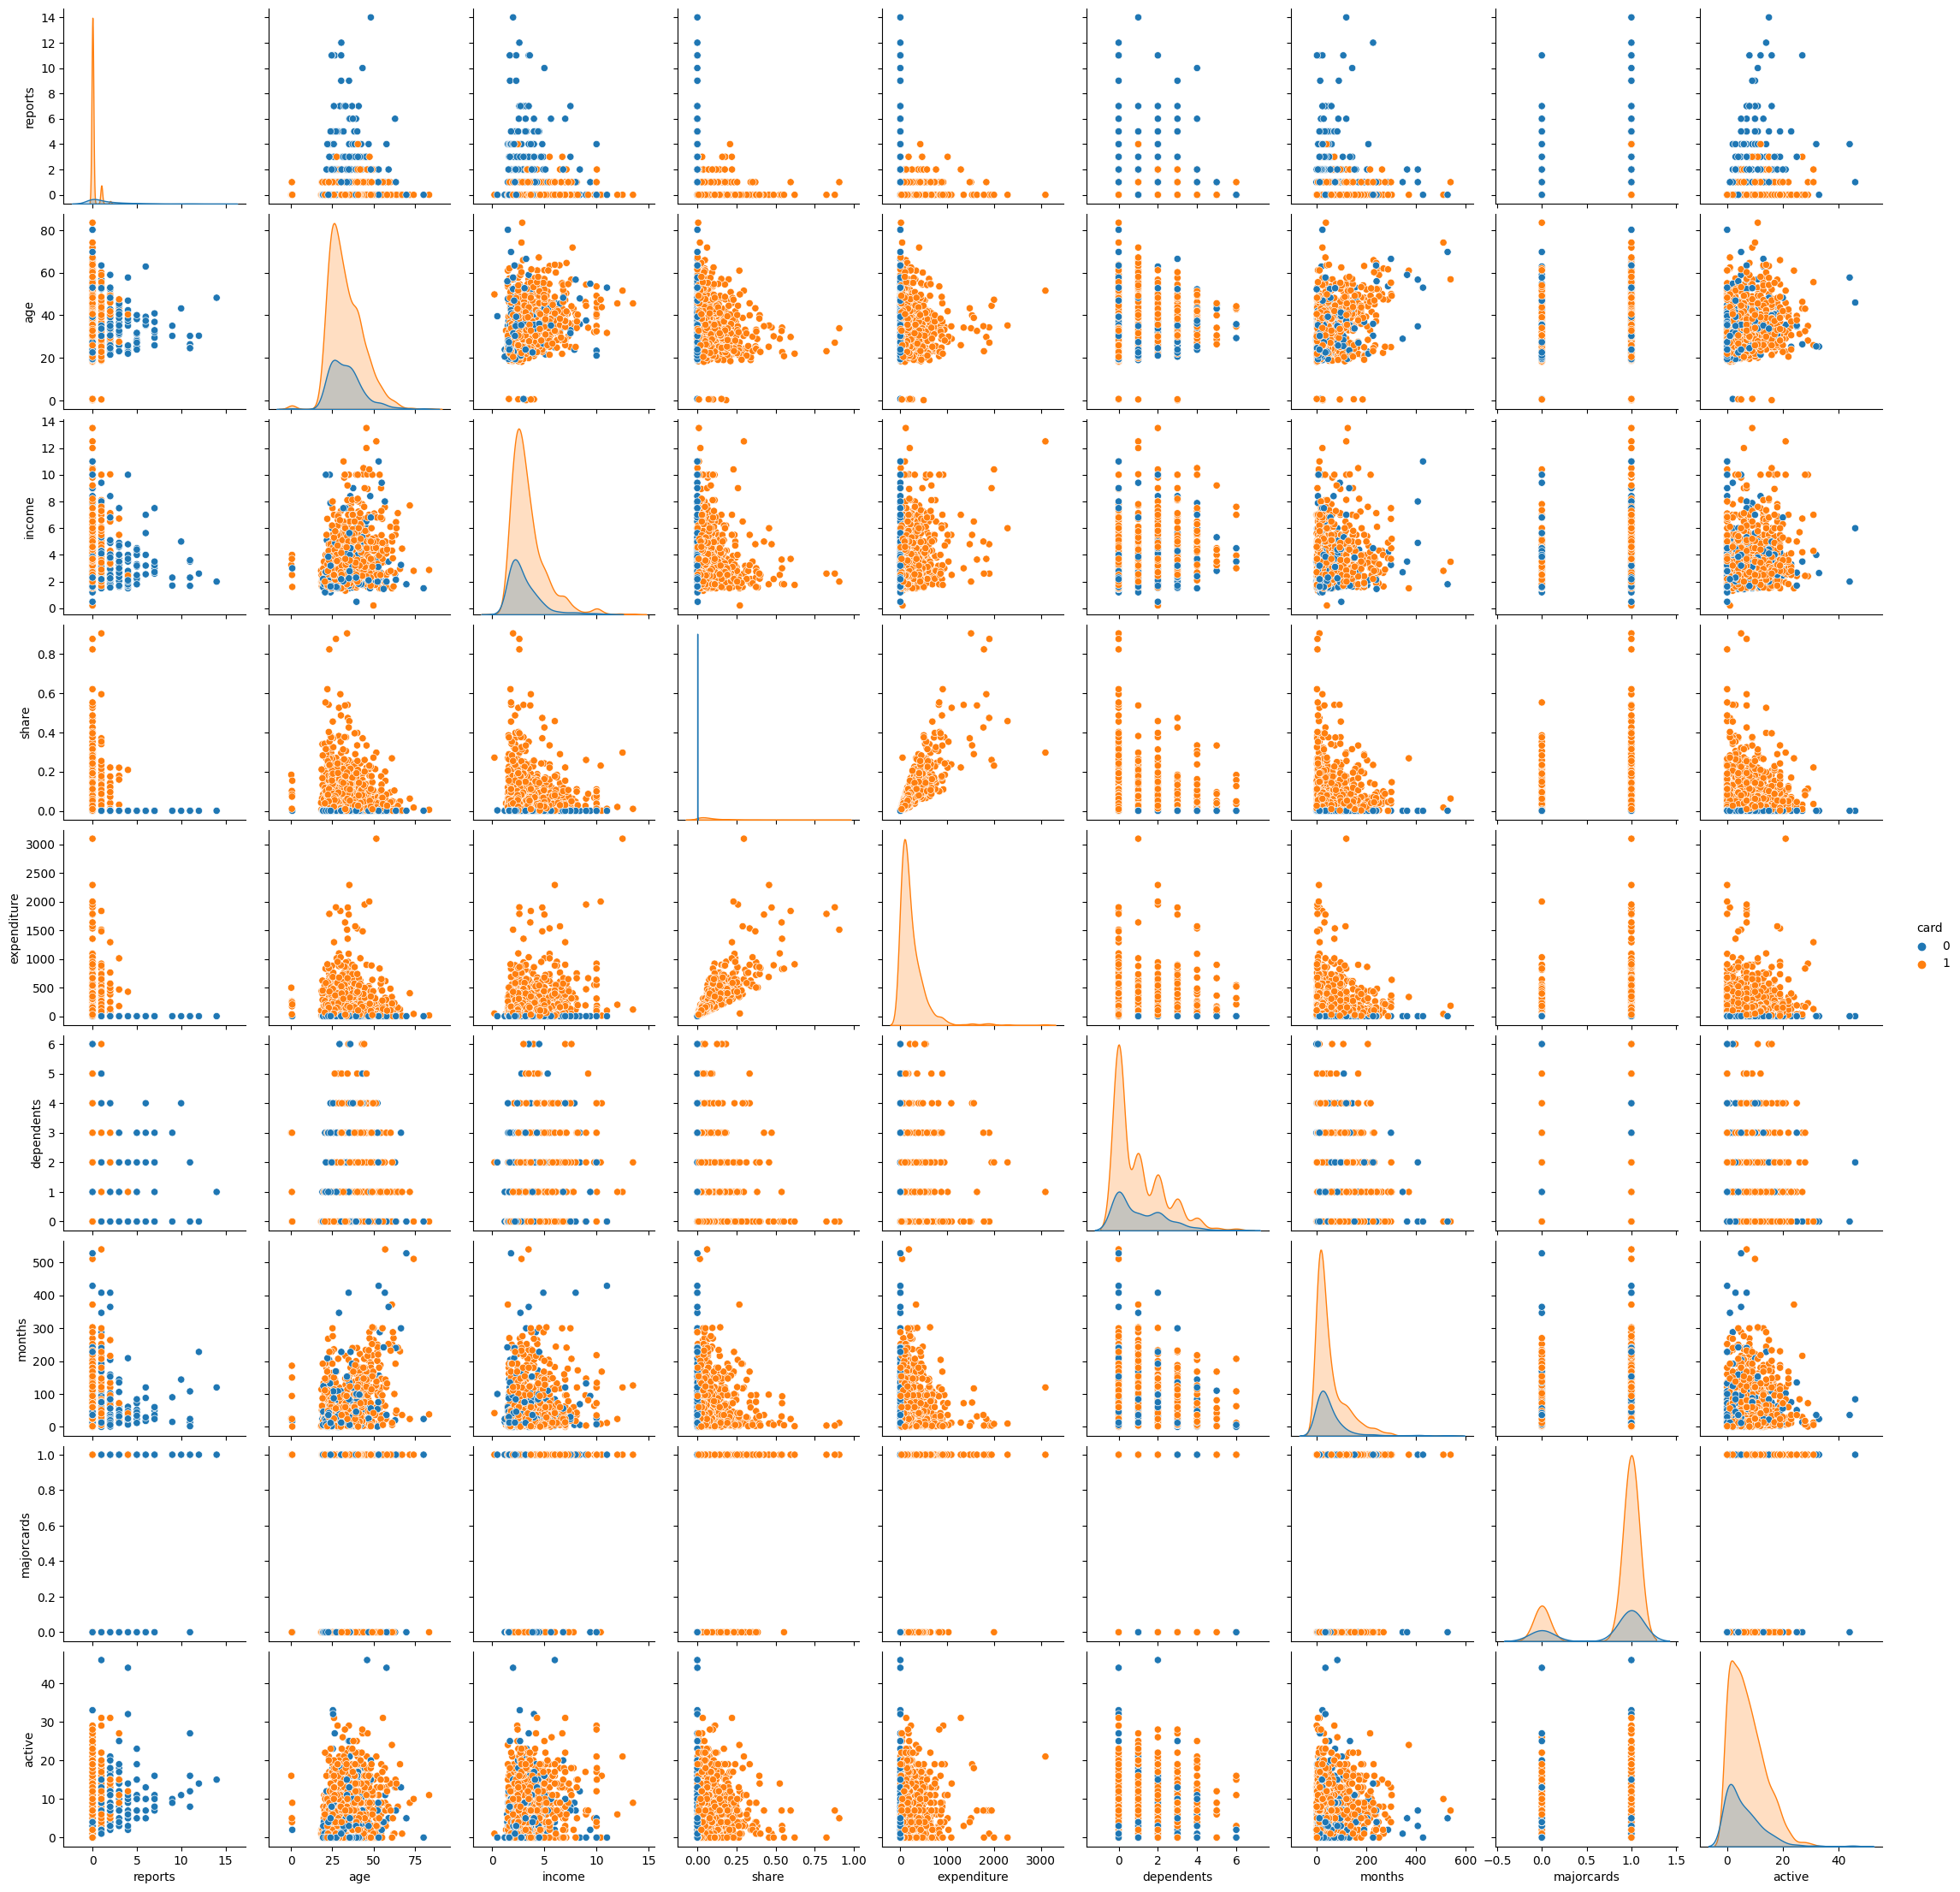

In [5]:
_ = sns.pairplot(data, hue="card")

In [6]:
print(  # the 'expenditure' feature in the data is always zero for the negative class
    data[data['card']==0]['expenditure'].sum()
)

print(  # the feature can also be zero in the positive class
    data[data['card']==1]['expenditure'].min()
)

0.0
0.0


In [7]:
with pd.option_context('display.max_rows', None):
    display(data.groupby('card').describe().T)

card                        0            1
reports     count  296.000000  1023.000000
            mean     1.587838     0.129032
            std      2.414445     0.416123
            min      0.000000     0.000000
            25%      0.000000     0.000000
            50%      1.000000     0.000000
            75%      2.000000     0.000000
            max     14.000000     4.000000
age         count  296.000000  1023.000000
            mean    33.202984    33.216031
            std      9.921287    10.210752
            min      0.750000     0.166667
            25%     25.645835    25.333330
            50%     31.833335    31.083330
            75%     38.062500    39.708335
            max     80.166660    83.500000
income      count  296.000000  1023.000000
            mean     3.068509     3.451273
            std      1.615336     1.707116
            min      0.490000     0.210000
            25%      2.000000     2.350000
            50%      2.590000     3.000000
            75%      3.625000     4.000000
            max     11.000000    13.500000
share       count  296.000000  1023.000000
            mean     0.000477     0.088482
            std      0.000213     0.099070
            min      0.000109     0.000186
            25%      0.000331     0.026635
            50%      0.000463     0.060209
            75%      0.000600     0.113858
            max      0.002449     0.906320
expenditure count  296.000000  1023.000000
            mean     0.000000   238.602421
            std      0.000000   287.709828
            min      0.000000     0.000000
            25%      0.000000    66.516665
            50%      0.000000   150.176700
            75%      0.000000   313.962050
            max      0.000000  3099.505000
dependents  count  296.000000  1023.000000
            mean     1.077703     0.969697
            std      1.263856     1.242614
            min      0.000000     0.000000
            25%      0.000000     0.000000
            50%      1.000000     0.000000
            75%      2.000000     2.000000
            max      6.000000     6.000000
months      count  296.000000  1023.000000
            mean    55.300676    55.258065
            std     71.523002    64.709934
            min      0.000000     0.000000
            25%     14.000000    12.000000
            50%     36.000000    30.000000
            75%     63.000000    72.000000
            max    528.000000   540.000000
majorcards  count  296.000000  1023.000000
            mean     0.739865     0.839687
            std      0.439451     0.367075
            min      0.000000     0.000000
            25%      0.000000     1.000000
            50%      1.000000     1.000000
            75%      1.000000     1.000000
            max      1.000000     1.000000
active      count  296.000000  1023.000000
            mean     6.054054     7.269795
            std      6.952413     6.082404
            min      0.000000     0.000000
            25%      0.000000     2.000000
            50%      4.000000     6.000000
            75%      9.000000    11.000000
            max     46.000000    31.000000

In [8]:
# splits data

fulltrain_df, test_df = train_test_split(data, test_size=0.2, random_state=1)
train_df, val_df = train_test_split(fulltrain_df, test_size=0.25, random_state=1)

len(train_df), len(val_df), len(test_df)

(791, 264, 264)

# Section 2

In [9]:
from typing import List
from pandas.api.types import is_numeric_dtype
from sklearn.metrics import roc_auc_score
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline

## Question 1

* For each numerical variable, use it as score and compute AUC with the `card` variable.
* Use the training dataset for that.
* If your AUC is < 0.5, invert this variable by putting "-" in front (e.g. `-df_train['expenditure']`).
    - AUC can go below 0.5 if the variable is negatively correlated with the target varialble. You can change the direction of the correlation by negating this variable - then negative correlation becomes positive.
* Which numerical variable (among the following 4) has the highest AUC?
    - `reports`
    - `dependents`
    - `active`
    - `share`

In [10]:
for col in train_df.select_dtypes('number').columns:
    # print(col)
    score = roc_auc_score(train_df.card, train_df[col])
    if score<0.5:
        score = roc_auc_score(train_df.card, -train_df[col])
    print(f"column = {col:>12s}\troc_auc_score = {score:.3f}")


column =         card	roc_auc_score = 1.000
column =      reports	roc_auc_score = 0.717
column =          age	roc_auc_score = 0.524
column =       income	roc_auc_score = 0.591
column =        share	roc_auc_score = 0.989
column =  expenditure	roc_auc_score = 0.991
column =   dependents	roc_auc_score = 0.533
column =       months	roc_auc_score = 0.529
column =   majorcards	roc_auc_score = 0.534
column =       active	roc_auc_score = 0.604


**Answer**: `share`

## Question 2

What's the AUC of this model on the validation dataset?

In [11]:
# checks whether a column in a dataframe is numeric or not
is_numeric_dtype(train_df['share'])

True

In [12]:
X_train = train_df.reset_index(drop=True)
y_train = X_train.pop('card')

X_val = val_df.reset_index(drop=True)
y_val = X_val.pop('card')

X_test = test_df.reset_index(drop=True)
y_test = X_test.pop('card')

len(X_train), len(y_train), len(y_val), len(y_test), type(X_train), type(y_test)

(791, 791, 264, 264, pandas.core.frame.DataFrame, pandas.core.series.Series)

In [13]:
# trains model

dv = DictVectorizer(sparse=False)
lr = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)

pipe = Pipeline(steps=[
    ('dv', dv),
    ('logistic', lr)
])

X_train_dicts = X_train.to_dict(orient='records')
pipe.fit(X_train_dicts, y_train)


Pipeline(steps=[('dv', DictVectorizer(sparse=False)),
                ('logistic',
                 LogisticRegression(max_iter=1000, solver='liblinear'))])

In [14]:
X_val_dicts = X_val.to_dict(orient='records')
y_hat = pipe.predict_proba(X_val_dicts)[:, 1]  # predicts probability of positive class

roc_auc_score(y_val, y_hat)


0.995171242063847

**Answer**: 0.995

## Question 3

Now let's compute precision and recall for our model.

* Evaluate the model on the validation dataset on all thresholds from 0.0 to 1.0 with step 0.01
* For each threshold, compute precision and recall
* Plot them

At which threshold precision and recall curves intersect?

In [15]:
def precision_recall(y_true, y_pred):
    """
    Returns the precision and recall for 
    the true classes and predicted classes passed.
    """
    precision = y_true[y_pred==1].mean()
    recall = y_pred[y_true==1].mean()
    return precision, recall

In [16]:
y_pred = (y_hat>0.1).astype(int)
precision_recall(y_val, y_pred)

(0.9251101321585903, 0.995260663507109)

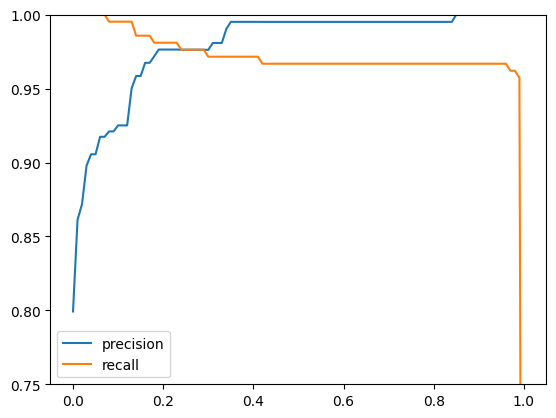

In [17]:
thresh = np.arange(0, 1.01, 0.01)  # creates an array from 0 to 1, with step size of 0.01 
p = []
r = []

for t in thresh:
    y_pred = (y_hat>t).astype(int)  # if predicted probability > t, assigns positive class 
    precision, recall = precision_recall(y_val, y_pred)
    p.append(precision)
    r.append(recall)

_ = plt.plot(thresh, p, label='precision')
_ = plt.plot(thresh, r, label='recall')
_ = plt.ylim(0.75, 1.0)
_ = plt.legend()

**Answer**: 0.3

## Question 4

Precision and recall are conflicting - when one grows, the other goes down. That's why they are often combined into the F1 score - a metric that takes both into account.

This is the formula for computing $F_1$:
$$F_1 = 2 \cdot \cfrac{P \cdot R}{P + R}$$

Where $P$ is precision and $R$ is recall.
Let's compute F1 for all thresholds from 0.0 to 1.0 with increment 0.01 using the validation set

At which threshold F1 is maximal?

- 0.1
- 0.4
- 0.6
- 0.7


In [18]:
thresh = np.arange(0, 1.01, 0.01)
f1s = []
for t in thresh:
    y_pred = (y_hat>t).astype(int)
    precision, recall = precision_recall(y_val, y_pred)
    f1 = 2 * ((precision * recall) / (precision + recall))  # computes F1 score from precision and recall
    f1s.append(f1)

f1s[:10]

[0.8884210526315789,
 0.9254385964912281,
 0.9315673289183224,
 0.946188340807175,
 0.9504504504504505,
 0.9504504504504505,
 0.9569160997732427,
 0.9569160997732427,
 0.9567198177676538,
 0.9567198177676538]

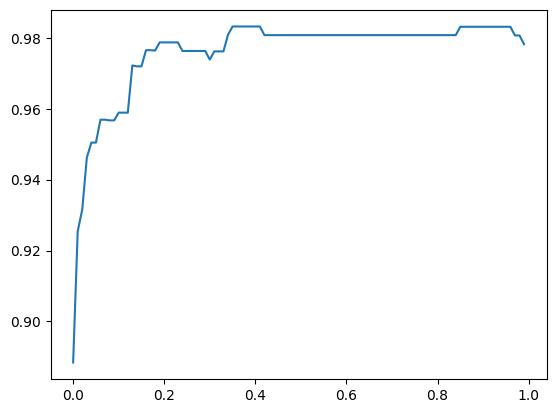

In [19]:
_ = plt.plot(thresh, f1s)

In [20]:
max_f1 = max(f1s)
thresh[f1s == max_f1]  # thresholds with highest F1 scores

array([0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41])

**Answer**: 0.4

## Question 5

Use the `KFold` class from Scikit-Learn to evaluate our model on 5 different folds:
```
KFold(n_splits=5, shuffle=True, random_state=1)
```
* Iterate over different folds of `df_full_train`
* Split the data into train and validation
* Train the model on train with these parameters: `LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)`
* Use AUC to evaluate the model on validation

How large is standard devidation of the AUC scores across different folds?

In [21]:
def kfold_roc_auc_scores(k:int =5, C:int =1.0) -> List[float]:
    """
    Returns a list of ROC AUC scores, based on k and C values.
    """
    kf = KFold(n_splits=k, shuffle=True, random_state=1)
    scores = []
    
    for train_index, val_index in kf.split(fulltrain_df):
        
        # creates train val splits from data using indices from KFold
        X_train_fold = fulltrain_df.iloc[train_index].copy()
        y_train_fold = X_train_fold.pop('card')
        X_val_fold = fulltrain_df.iloc[val_index].copy()
        y_val_fold = X_val_fold.pop('card')
    
        # model init
        dv = DictVectorizer(sparse=False)
        lr = LogisticRegression(solver='liblinear', C=C, max_iter=1000)
    
        # trains model
        X_train_fold_dicts = X_train_fold.to_dict(orient='records')
        X_train_fold_dicts = dv.fit_transform(X_train_fold_dicts)
        lr.fit(X_train_fold_dicts, y_train_fold)
    
        # predictions
        X_val_fold_dicts = X_val_fold.to_dict(orient='records')
        X_val_fold_dicts = dv.transform(X_val_fold_dicts)
        y_hat_fold = lr.predict_proba(X_val_fold_dicts)[:, 1]
        score = roc_auc_score(y_val_fold, y_hat_fold)

        scores.append(score)

    return scores


In [22]:
scores = kfold_roc_auc_scores()
round(np.std(scores), 3)

0.003

**Answer**: 0.003

## Question 6

Now let's use 5-Fold cross-validation to find the best parameter C

* Iterate over the following C values: `[0.01, 0.1, 1, 10]`
* Initialize `KFold` with the same parameters as previously
* Use these parametes for the model: `LogisticRegression(solver='liblinear', C=C, max_iter=1000)`
* Compute the mean score as well as the std (round the mean and std to 3 decimal digits)

Which C leads to the best mean score?

In [23]:
C_values = [0.01, 0.1, 1, 10]
scores = []

for c in C_values:
    scores_fold = kfold_roc_auc_scores(C=c)
    scores.append((np.mean(scores_fold), np.std(scores_fold)))

for i, j in zip(C_values, scores):
    print("C=%4s, mean=%.3f, std=%.3f" % (i, j[0], j[1]))

C=0.01, mean=0.992, std=0.006
C= 0.1, mean=0.995, std=0.004
C=   1, mean=0.996, std=0.003
C=  10, mean=0.996, std=0.003


**Answer**: 1